In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
mental_file='C:/Users/ECON/Downloads/spaceship_train.zip'
spaceship_train=pd.read_csv(mental_file)
spaceship_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [3]:
mental_file_test='C:/Users/ECON/Downloads/spaceship_test.zip'
spaceship_test=pd.read_csv(mental_file_test)
spaceship_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [4]:
spaceship_train['Destination'].value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

In [5]:
spaceship_train[['Destination','Cabin','HomePlanet']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Destination  8511 non-null   object
 1   Cabin        8494 non-null   object
 2   HomePlanet   8492 non-null   object
dtypes: object(3)
memory usage: 203.9+ KB


In [6]:
spaceship_train['Destination'].describe()

count            8511
unique              3
top       TRAPPIST-1e
freq             5915
Name: Destination, dtype: object

In [7]:
spaceship_train['Cabin'].describe()

count        8494
unique       6560
top       G/734/S
freq            8
Name: Cabin, dtype: object

In [8]:
spaceship_train['HomePlanet'].describe()

count      8492
unique        3
top       Earth
freq       4602
Name: HomePlanet, dtype: object

In [9]:
spaceship_train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [10]:
planet={
 'Earth':0,
 'Europa':1,
 'Mars':-1,
}
destiny={
 '55 Cancri e':0,
 'TRAPPIST-1e':1,
 'PSO J318.5-22':-1    
}

In [11]:
spaceship_train['HomePlanet']=spaceship_train['HomePlanet'].map(planet)
spaceship_test['HomePlanet']=spaceship_test['HomePlanet'].map(planet)

In [12]:
spaceship_train['Destination']=spaceship_train['Destination'].map(destiny)
spaceship_test['Destination']=spaceship_test['Destination'].map(destiny)

In [13]:
spaceship_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,1.0,False,B/0/P,1.0,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,0.0,False,F/0/S,1.0,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,1.0,False,A/0/S,1.0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,1.0,False,A/0/S,1.0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,0.0,False,F/1/S,1.0,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1.0,False,A/98/P,0.0,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,0.0,True,G/1499/S,-1.0,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,0.0,False,G/1500/S,1.0,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,1.0,False,E/608/S,0.0,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [14]:
binary={
    True:1,
    False:0
}
spaceship_train['CryoSleep']=spaceship_train['CryoSleep'].map(binary)
spaceship_test['CryoSleep']=spaceship_test['CryoSleep'].map(binary)

In [15]:
spaceship_train['VIP']=spaceship_train['VIP'].map(binary)
spaceship_test['VIP']=spaceship_test['VIP'].map(binary)

In [16]:
spaceship_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,1.0,0.0,B/0/P,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,0.0,0.0,F/0/S,1.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,1.0,0.0,A/0/S,1.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,1.0,0.0,A/0/S,1.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,0.0,0.0,F/1/S,1.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1.0,0.0,A/98/P,0.0,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,0.0,1.0,G/1499/S,-1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,0.0,0.0,G/1500/S,1.0,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,1.0,0.0,E/608/S,0.0,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [17]:
spaceship_train[['Deck', 'Number', 'Side']] = spaceship_train['Cabin'].str.split('/', expand=True)
spaceship_test[['Deck', 'Number', 'Side']] = spaceship_test['Cabin'].str.split('/', expand=True)

In [18]:
spaceship_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Number,Side
0,0001_01,1.0,0.0,B/0/P,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,0.0,0.0,F/0/S,1.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,1.0,0.0,A/0/S,1.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,1.0,0.0,A/0/S,1.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,0.0,0.0,F/1/S,1.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1.0,0.0,A/98/P,0.0,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P
8689,9278_01,0.0,1.0,G/1499/S,-1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S
8690,9279_01,0.0,0.0,G/1500/S,1.0,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S
8691,9280_01,1.0,0.0,E/608/S,0.0,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S


In [19]:
spaceship_train['Deck'].value_counts()

Deck
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: count, dtype: int64

In [20]:
spaceship_train['Transported']=spaceship_train['Transported'].map(binary)

([<matplotlib.patches.Wedge at 0x22669b8ae10>,
 [Text(0.563101166796754, 0.9449428956038214, ''),
  Text(-1.0909530811175054, 0.14078840435285056, ''),
  Text(-0.4572256134793619, -1.0004722576755547, ''),
  Text(0.20066579478681268, -1.0815420652025407, ''),
  Text(0.748076421293984, -0.8064624404793976, ''),
  Text(1.0256156918944175, -0.39763356566056557, ''),
  Text(1.0946807489543147, -0.1080465541737482, ''),
  Text(1.0999981191309014, -0.0020341849668980855, '')],
 [Text(0.3071460909800476, 0.5154233976020843, '32.9%'),
  Text(-0.5950653169731848, 0.07679367510155484, '30.1%'),
  Text(-0.249395789170561, -0.5457121405503025, '10.3%'),
  Text(0.10945406988371599, -0.5899320355650222, '9.2%'),
  Text(0.408041684342173, -0.4398886038978532, '8.8%'),
  Text(0.5594267410333186, -0.21689103581485392, '5.6%'),
  Text(0.597098590338717, -0.05893448409477174, '3.0%'),
  Text(0.5999989740714007, -0.0011095554364898648, '0.1%')])

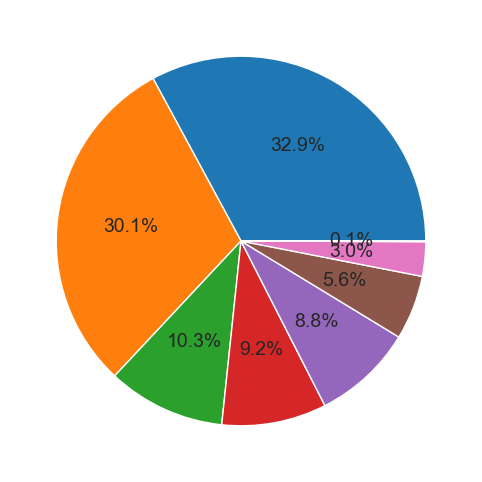

In [21]:
plt.pie(spaceship_train['Deck'].value_counts(),autopct = '%1.1f%%')

In [22]:
spaceship_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Number,Side
0,0001_01,1.0,0.0,B/0/P,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,B,0,P
1,0002_01,0.0,0.0,F/0/S,1.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,F,0,S
2,0003_01,1.0,0.0,A/0/S,1.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,A,0,S
3,0003_02,1.0,0.0,A/0/S,1.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,A,0,S
4,0004_01,0.0,0.0,F/1/S,1.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1.0,0.0,A/98/P,0.0,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,A,98,P
8689,9278_01,0.0,1.0,G/1499/S,-1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,G,1499,S
8690,9279_01,0.0,0.0,G/1500/S,1.0,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,G,1500,S
8691,9280_01,1.0,0.0,E/608/S,0.0,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,E,608,S


In [23]:
desk={
'F':0,
'G' : 1,
'E' : 2,
'B' : 3,
'C' : 4,
'D' : 5,
'A' : 6,
'T': 7
}
spaceship_train['Deck']=spaceship_train['Deck'].map(desk)
spaceship_test['Deck']=spaceship_test['Deck'].map(desk)

In [24]:
encoder=OneHotEncoder(handle_unknown='ignore',sparse_output=False)

In [25]:
spaceship_train=spaceship_train.drop(columns=['Cabin','Name','PassengerId'])
spaceship_test=spaceship_test.drop(columns=['Cabin','Name','PassengerId'])

In [26]:
spaceship_train.isna().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
Deck            199
Number          199
Side            199
dtype: int64

In [27]:
spaceship_train[['HomePlanet','Destination']]=spaceship_train[['HomePlanet','Destination']].fillna(1)
spaceship_test[['HomePlanet','Destination']]=spaceship_test[['HomePlanet','Destination']].fillna(1)

In [29]:
spaceship_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Number,Side
0,1.0,0.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3.0,0,P
1,0.0,0.0,1.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1,0.0,0,S
2,1.0,0.0,1.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0,6.0,0,S
3,1.0,0.0,1.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0,6.0,0,S
4,0.0,0.0,1.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1,0.0,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1.0,0.0,0.0,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,0,6.0,98,P
8689,0.0,1.0,-1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1499,S
8690,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,1,1.0,1500,S
8691,1.0,0.0,0.0,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,0,2.0,608,S


In [30]:
spaceship_train.columns.tolist()

['HomePlanet',
 'CryoSleep',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Transported',
 'Deck',
 'Number',
 'Side']

In [31]:
input_cols=['HomePlanet','CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall','Spa', 'VRDeck','Deck','Number','Side']
target_cols='Transported'

In [32]:
train_inputs=spaceship_train[input_cols].copy()
train_targets=spaceship_train[target_cols].copy()

In [33]:
test_inputs=spaceship_test[input_cols].copy()

In [34]:
categorical_cols=train_inputs.select_dtypes('object').columns.tolist()
numeric_cols=train_inputs.select_dtypes(include=np.number).columns.tolist()

In [35]:
imputer=SimpleImputer(strategy='mean')

In [36]:
spaceship_train[['CryoSleep','VIP']]=spaceship_train[['CryoSleep','VIP']].fillna(0)
spaceship_test[['CryoSleep','VIP']]=spaceship_test[['CryoSleep','VIP']].fillna(0)

In [37]:
imputer.fit(train_inputs[numeric_cols])

SimpleImputer()

In [38]:
train_inputs[numeric_cols]=imputer.transform(train_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [39]:
spaceship_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Number,Side
0,1.0,0.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3.0,0,P
1,0.0,0.0,1.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1,0.0,0,S
2,1.0,0.0,1.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0,6.0,0,S
3,1.0,0.0,1.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0,6.0,0,S
4,0.0,0.0,1.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1,0.0,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1.0,0.0,0.0,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,0,6.0,98,P
8689,0.0,1.0,-1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1499,S
8690,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,1,1.0,1500,S
8691,1.0,0.0,0.0,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,0,2.0,608,S


In [40]:
categorical_col=['Side']

In [41]:
encoder.fit(train_inputs[categorical_col])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [42]:
encoded_cols=encoder.get_feature_names_out()
train_inputs[encoded_cols]=encoder.transform(train_inputs[categorical_col])
test_inputs[encoded_cols]=encoder.transform(test_inputs[categorical_col])

In [43]:
train_inputs

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Number,Side,Side_P,Side_S,Side_nan
0,1.0,0.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0,P,1.0,0.0,0.0
1,0.0,0.0,1.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,0.0,0,S,0.0,1.0,0.0
2,1.0,0.0,1.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,6.0,0,S,0.0,1.0,0.0
3,1.0,0.0,1.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,6.0,0,S,0.0,1.0,0.0
4,0.0,0.0,1.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,0.0,1,S,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1.0,0.0,0.0,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,6.0,98,P,1.0,0.0,0.0
8689,0.0,1.0,-1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1499,S,0.0,1.0,0.0
8690,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,1.0,1500,S,0.0,1.0,0.0
8691,1.0,0.0,0.0,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,2.0,608,S,0.0,1.0,0.0


In [44]:
spaceship_train['Numbers'] = pd.to_numeric(spaceship_train['Number'], errors='coerce')
spaceship_test['Numbers'] = pd.to_numeric(spaceship_test['Number'], errors='coerce')

In [45]:
train_inputs['Numbers'] = pd.to_numeric(train_inputs['Number'], errors='coerce')
test_inputs['Numbers'] = pd.to_numeric(test_inputs['Number'], errors='coerce')

In [46]:
train_inputs

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Number,Side,Side_P,Side_S,Side_nan,Numbers
0,1.0,0.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0,P,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,0.0,0,S,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,6.0,0,S,0.0,1.0,0.0,0.0
3,1.0,0.0,1.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,6.0,0,S,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,0.0,1,S,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1.0,0.0,0.0,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,6.0,98,P,1.0,0.0,0.0,98.0
8689,0.0,1.0,-1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1499,S,0.0,1.0,0.0,1499.0
8690,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,1.0,1500,S,0.0,1.0,0.0,1500.0
8691,1.0,0.0,0.0,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,2.0,608,S,0.0,1.0,0.0,608.0


In [47]:
train_inputs['Numbers'].isna().sum()

199

In [48]:
train_inputs['Numbers'] = train_inputs['Numbers'].fillna(train_inputs['Numbers'].mode()[0])
test_inputs['Numbers'] = test_inputs['Numbers'].fillna(test_inputs['Numbers'].mode()[0])

In [49]:
train_inputs.isna().sum()

HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Deck              0
Number          199
Side            199
Side_P            0
Side_S            0
Side_nan          0
Numbers           0
dtype: int64

In [50]:
drop_col=train_inputs[['Number','Side','Side_nan']]
drop_col1=test_inputs[['Number','Side','Side_nan']]

In [51]:
for x in drop_col:
    train_inputs=train_inputs.drop(columns=x)
    test_inputs=test_inputs.drop(columns=x)

In [52]:
cost=['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

In [53]:
train_inputs['Total']=train_inputs['RoomService']+train_inputs['FoodCourt']+train_inputs['ShoppingMall']+train_inputs['Spa']+train_inputs['VRDeck']
test_inputs['Total']=test_inputs['RoomService']+test_inputs['FoodCourt']+test_inputs['ShoppingMall']+test_inputs['Spa']+test_inputs['VRDeck']

In [54]:
train_inputs

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side_P,Side_S,Numbers,Total
0,1.0,0.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,0.0,0.0,1.0,0.0,736.0
2,1.0,0.0,1.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,6.0,0.0,1.0,0.0,10383.0
3,1.0,0.0,1.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,6.0,0.0,1.0,0.0,5176.0
4,0.0,0.0,1.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,0.0,0.0,1.0,1.0,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1.0,0.0,0.0,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,6.0,1.0,0.0,98.0,8536.0
8689,0.0,1.0,-1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1499.0,0.0
8690,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,1.0,0.0,1.0,1500.0,1873.0
8691,1.0,0.0,0.0,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,2.0,0.0,1.0,608.0,4637.0


In [55]:
scaler=MinMaxScaler()

In [56]:
numeric_cols1=train_inputs.select_dtypes(include=np.number).columns.tolist()

In [57]:
scaler.fit(train_inputs[numeric_cols1])

MinMaxScaler()

In [58]:
train_inputs[numeric_cols1]=scaler.transform(train_inputs[numeric_cols1])
test_inputs[numeric_cols1] = scaler.transform(test_inputs[numeric_cols1])

In [59]:
train_inputs

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side_P,Side_S,Numbers,Total
0,1.0,0.0,1.0,0.493671,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.428571,1.0,0.0,0.000000,0.000000
1,0.5,0.0,1.0,0.303797,0.0,0.007608,0.000302,0.001064,0.024500,0.001823,0.000000,0.0,1.0,0.000000,0.020452
2,1.0,0.0,1.0,0.734177,1.0,0.003001,0.119948,0.000000,0.299670,0.002030,0.857143,0.0,1.0,0.000000,0.288521
3,1.0,0.0,1.0,0.417722,0.0,0.000000,0.043035,0.015793,0.148563,0.007997,0.857143,0.0,1.0,0.000000,0.143830
4,0.5,0.0,1.0,0.202532,0.0,0.021149,0.002348,0.006428,0.025214,0.000083,0.000000,0.0,1.0,0.000528,0.030317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1.0,0.0,0.5,0.518987,1.0,0.000000,0.228726,0.000000,0.073322,0.003066,0.857143,1.0,0.0,0.051742,0.237197
8689,0.5,1.0,0.0,0.227848,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.0,1.0,0.791447,0.000000
8690,0.5,0.0,1.0,0.329114,0.0,0.000000,0.000000,0.079687,0.000045,0.000000,0.142857,0.0,1.0,0.791975,0.052047
8691,1.0,0.0,0.5,0.405063,0.0,0.000000,0.035186,0.000000,0.015753,0.134049,0.285714,0.0,1.0,0.321014,0.128852


In [60]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score

In [61]:
X=train_inputs.copy()
Y=train_targets.copy()

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_val=train_test_split(train_inputs,test_size=0.25,random_state=42)
train_targets,val_targets=train_test_split(train_targets,test_size=0.25,random_state=42)

In [65]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Logistic Regression
model = LogisticRegression(solver='liblinear')

# Placeholder to store results
accuracy_scores = []
roc_auc_scores = []
f1_scores = []
precision_scores = []
recall_scores = []

# K-Fold Cross-Validation
for train_index, val_index in kf.split(X):
    # Split data into train and test sets
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    Y_train, Y_val = Y.iloc[train_index], Y.iloc[val_index]
    
    model.fit(X_train, Y_train)

    # Predict on test set
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:, 1]  # Predicted probabilities for ROC AUC

    # Calculate metrics
    acc = accuracy_score(Y_val,y_pred)
    f1 = f1_score(Y_val, y_pred)
    prec = precision_score(Y_val, y_pred)
    rec = recall_score(Y_val, y_pred)
    roc_auc = roc_auc_score(Y_val, y_prob)

    # Append metrics to lists
    accuracy_scores.append(acc)
    f1_scores.append(f1)
    precision_scores.append(prec)
    recall_scores.append(rec)
    roc_auc_scores.append(roc_auc)

# Print cross-validation results
print("Cross-Validation Accuracy Scores:", accuracy_scores)
print("Cross-Validation F1 Scores:", f1_scores)
print("Cross-Validation Precision Scores:", precision_scores)
print("Cross-Validation Recall Scores:", recall_scores)
print("Cross-Validation ROC AUC Scores:", roc_auc_scores)

print("\nMean Metrics Across All Folds:")
print("Mean Accuracy:", np.mean(accuracy_scores))
print("Mean F1 Score:", np.mean(f1_scores))
print("Mean Precision:", np.mean(precision_scores))
print("Mean Recall:", np.mean(recall_scores))
print("Mean ROC AUC:", np.mean(roc_auc_scores))

Cross-Validation Accuracy Scores: [0.7550316273720529, 0.7544565842438183, 0.7763082231167338, 0.7640966628308401, 0.7744533947065593]
Cross-Validation F1 Scores: [0.741190765492102, 0.7381974248927039, 0.753015873015873, 0.7459727385377943, 0.7556109725685786]
Cross-Validation Precision Scores: [0.7942708333333334, 0.8080536912751678, 0.8316970546984572, 0.8048128342245989, 0.8440111420612814]
Cross-Validation Recall Scores: [0.6947608200455581, 0.6794582392776524, 0.6879350348027842, 0.6951501154734411, 0.6839729119638827]
Cross-Validation ROC AUC Scores: [0.8332896801145038, 0.8377126011236401, 0.8489220528748344, 0.841006843655317, 0.8517218813255757]

Mean Metrics Across All Folds:
Mean Accuracy: 0.7648692984540009
Mean F1 Score: 0.7467975549014103
Mean Precision: 0.8165691111185677
Mean Recall: 0.6882554243126636
Mean ROC AUC: 0.8425306118187741


In [66]:
model = LogisticRegression(solver='liblinear')

In [67]:
train_inputs

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side_P,Side_S,Numbers,Total
0,1.0,0.0,1.0,0.493671,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.428571,1.0,0.0,0.000000,0.000000
1,0.5,0.0,1.0,0.303797,0.0,0.007608,0.000302,0.001064,0.024500,0.001823,0.000000,0.0,1.0,0.000000,0.020452
2,1.0,0.0,1.0,0.734177,1.0,0.003001,0.119948,0.000000,0.299670,0.002030,0.857143,0.0,1.0,0.000000,0.288521
3,1.0,0.0,1.0,0.417722,0.0,0.000000,0.043035,0.015793,0.148563,0.007997,0.857143,0.0,1.0,0.000000,0.143830
4,0.5,0.0,1.0,0.202532,0.0,0.021149,0.002348,0.006428,0.025214,0.000083,0.000000,0.0,1.0,0.000528,0.030317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1.0,0.0,0.5,0.518987,1.0,0.000000,0.228726,0.000000,0.073322,0.003066,0.857143,1.0,0.0,0.051742,0.237197
8689,0.5,1.0,0.0,0.227848,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.0,1.0,0.791447,0.000000
8690,0.5,0.0,1.0,0.329114,0.0,0.000000,0.000000,0.079687,0.000045,0.000000,0.142857,0.0,1.0,0.791975,0.052047
8691,1.0,0.0,0.5,0.405063,0.0,0.000000,0.035186,0.000000,0.015753,0.134049,0.285714,0.0,1.0,0.321014,0.128852


In [68]:
model.fit(X,Y)

LogisticRegression(solver='liblinear')

In [69]:
model.score(X,Y)

0.770505004026228

In [70]:
importance_df=pd.DataFrame({
    "Feature":X.columns,
    "Coef":model.coef_.tolist()[0]
})
importance_df

,Feature,Coef
0,HomePlanet,0.460758
1,CryoSleep,1.911805
2,Destination,-0.027019
3,Age,-0.611312
4,VIP,-0.021744
5,RoomService,-6.907928
6,FoodCourt,8.536997
7,ShoppingMall,6.817919
8,Spa,-9.336506
9,VRDeck,-8.624034


In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [72]:
model=DecisionTreeClassifier(max_depth=8,random_state=42)

In [73]:
X_test=test_inputs.copy()

In [74]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LogisticRegression(solver='liblinear')

# Desired fold index (0-based, for example, 3rd fold)
desired_fold = 2

# Placeholder to store predictions on the predefined test set
global_test_preds = None  # This will hold predictions for the global test set

# Perform K-Fold
for fold_index, (train_index, val_index) in enumerate(kf.split(X)):
    if fold_index == desired_fold:
        # Split data into train and validation sets
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = Y.iloc[train_index], Y.iloc[val_index]

        # Train the model
        model.fit(X_train, y_train)

        # Predict on validation set
        y_val_pred = model.predict(X_val)
        y_val_prob = model.predict_proba(X_val)[:, 1]  # Probabilities for ROC AUC

        # Predict on predefined test set
        global_test_preds = model.predict(X_test)

        # Metrics for validation set
        accuracy = accuracy_score(y_val, y_val_pred)
        f1 = f1_score(y_val, y_val_pred)
        precision = precision_score(y_val, y_val_pred)
        recall = recall_score(y_val, y_val_pred)
        roc_auc = roc_auc_score(y_val, y_val_prob)

        # Print metrics for the fold
        print(f"Metrics for Fold {fold_index + 1} (Validation Set):")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"ROC AUC: {roc_auc:.4f}")
        break  # Process only the desired fold

Metrics for Fold 3 (Validation Set):
Accuracy: 0.7763
F1 Score: 0.7530
Precision: 0.8317
Recall: 0.6879
ROC AUC: 0.8489


In [75]:
global_test_preds

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [76]:
test_submission=pd.DataFrame(global_test_preds)

In [77]:
submission_file='C:/Users/ECON/Downloads/spaceship-titanic.zip'
spaceship_submission=pd.read_csv(submission_file)
spaceship_submission

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [78]:
binary1={
    0:False,
    1:True
}
test_submission['Transported']=test_submission[0].map(binary1)

In [79]:
test_submission.drop(columns='Transported')

,0
0,1
1,0
2,1
3,1
4,0
...,...
4272,1
4273,0
4274,1
4275,1


In [80]:
spaceship_submission['Transported']=test_submission[0]

In [81]:
spaceship_submission

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,0
...,...,...
4272,9266_02,1
4273,9269_01,0
4274,9271_01,1
4275,9273_01,1


In [82]:
spaceship_submission.to_csv('submissionSpaceship1.csv',index=False)

In [83]:
from IPython.display import FileLink

# Create a download link for the file
FileLink("submissionSpaceship1.csv")

C:\Users\ECON\submissionSpaceship1.csv

In [84]:
spaceship_submission.to_csv('submissionSpaceship1.csv.gz', index=False, compression='gzip')

# Create a download link for the GZIP file
FileLink("submissionSpaceship1.csv.gz")

C:\Users\ECON\submissionSpaceship1.csv.gz

In [85]:
model=DecisionTreeClassifier(max_depth=8,random_state=42)

In [86]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

desired_fold = 3

global_test_pred = None  

for fold_index, (train_index, val_index) in enumerate(kf.split(X)):
    if fold_index == desired_fold:
        # Split data into train and validation sets
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = Y.iloc[train_index], Y.iloc[val_index]

        # Train the model
        model.fit(X_train, y_train)

        # Predict on validation set
        y_val_pred = model.predict(X_val)
        y_val_prob = model.predict_proba(X_val)[:, 1]  # Probabilities for ROC AUC

        # Predict on predefined test set
        global_test_pred1 = model.predict(X_test)

        # Metrics for validation set
        accuracy = accuracy_score(y_val, y_val_pred)
        f1 = f1_score(y_val, y_val_pred)
        precision = precision_score(y_val, y_val_pred)
        recall = recall_score(y_val, y_val_pred)
        roc_auc = roc_auc_score(y_val, y_val_prob)

        # Print metrics for the fold
        print(f"Metrics for Fold {fold_index + 1} (Validation Set):")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"ROC AUC: {roc_auc:.4f}")
        break  # Process only the desired fold

Metrics for Fold 4 (Validation Set):
Accuracy: 0.7871
F1 Score: 0.7905
Precision: 0.7756
Recall: 0.8060
ROC AUC: 0.8490


In [87]:
param_dist = {
    'max_depth': list(np.arange(5,40,2)),
    'min_samples_split':[1,2,3],
    'max_leaf_nodes':[32,64,128,256]
}

In [88]:
from sklearn.model_selection import RandomizedSearchCV

In [89]:
random_search = RandomizedSearchCV(estimator=DecisionTreeClassifier(), param_distributions=param_dist, n_iter=20, cv=5, n_jobs=-1)

In [90]:
random_search.fit(X,Y)

C:\Users\ECON\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ECON\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ECON\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\ECON\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", 

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 7, 9, 11, 13, 15, 17,
                                                      19, 21, 23, 25, 27, 29,
                                                      31, 33, 35, 37, 39],
                                        'max_leaf_nodes': [32, 64, 128, 256],
                                        'min_samples_split': [1, 2, 3]})

In [91]:
best_params = random_search.best_params_
print("Best Parameters from Randomized Search:", best_params)

Best Parameters from Randomized Search: {'min_samples_split': 3, 'max_leaf_nodes': 64, 'max_depth': 17}


In [92]:
model=DecisionTreeClassifier(random_state=42,min_samples_split=2,max_leaf_nodes=64,max_depth=35)

In [93]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

desired_fold = 3

global_test_pred = None  

for fold_index, (train_index, val_index) in enumerate(kf.split(X)):
    if fold_index == desired_fold:
        # Split data into train and validation sets
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = Y.iloc[train_index], Y.iloc[val_index]

        # Train the model
        model.fit(X_train, y_train)

        # Predict on validation set
        y_val_pred = model.predict(X_val)
        y_val_prob = model.predict_proba(X_val)[:, 1]  # Probabilities for ROC AUC

        # Predict on predefined test set
        global_test_pred1 = model.predict(X_test)

        # Metrics for validation set
        accuracy = accuracy_score(y_val, y_val_pred)
        f1 = f1_score(y_val, y_val_pred)
        precision = precision_score(y_val, y_val_pred)
        recall = recall_score(y_val, y_val_pred)
        roc_auc = roc_auc_score(y_val, y_val_prob)

        # Print metrics for the fold
        print(f"Metrics for Fold {fold_index + 1} (Validation Set):")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"ROC AUC: {roc_auc:.4f}")
        break  # Process only the desired fold

Metrics for Fold 4 (Validation Set):
Accuracy: 0.7975
F1 Score: 0.7972
Precision: 0.7954
Recall: 0.7991
ROC AUC: 0.8667


In [94]:
test_submission1=pd.DataFrame(global_test_pred1)

In [95]:
binary1={
    0:False,
    1:True
}
test_submission1['Transported']=test_submission1[0].map(binary1)

In [96]:
test_submission1

,0,Transported
0,1,True
1,0,False
2,1,True
3,1,True
4,0,False
...,...,...
4272,1,True
4273,1,True
4274,1,True
4275,1,True


In [97]:
test_submission1.drop(columns=0)

,Transported
0,True
1,False
2,True
3,True
4,False
...,...
4272,True
4273,True
4274,True
4275,True


In [98]:
spaceship_submission['Transported']=test_submission1['Transported']

In [99]:
spaceship_submission.to_csv('submissionSpaceship3.csv.gz', index=False, compression='gzip')

# Create a download link for the GZIP file
FileLink("submissionSpaceship3.csv.gz")

C:\Users\ECON\submissionSpaceship3.csv.gz

In [100]:
param_dist = {
    'max_depth': list(np.arange(5,50,5)),
    'min_samples_split':[1,2,3],
    'max_leaf_nodes':[32,64,128,256],
    'bootstrap':[False,True],
     'max_samples':[0.6,0.7,0.8]
}

In [101]:
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=param_dist, n_iter=20, cv=5, n_jobs=-1)

In [102]:
random_search.fit(X,Y)

C:\Users\ECON\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ECON\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ECON\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ECON\AppData\L

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [False, True],
                                        'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45],
                                        'max_leaf_nodes': [32, 64, 128, 256],
                                        'max_samples': [0.6, 0.7, 0.8],
                                        'min_samples_split': [1, 2, 3]})

In [103]:
best_params = random_search.best_params_
print("Best Parameters from Randomized Search:", best_params)

Best Parameters from Randomized Search: {'min_samples_split': 2, 'max_samples': 0.6, 'max_leaf_nodes': 256, 'max_depth': 20, 'bootstrap': True}


In [104]:
model=RandomForestClassifier(random_state=42,min_samples_split=2,bootstrap=True,max_samples=0.6,max_leaf_nodes=256, max_depth=20)

In [108]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

desired_fold = 3

global_test_pred = None  

for fold_index, (train_index, val_index) in enumerate(kf.split(X)):
        # Split data into train and validation sets
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = Y.iloc[train_index], Y.iloc[val_index]

        # Train the model
        model.fit(X_train, y_train)

        # Predict on validation set
        y_val_pred = model.predict(X_val)
        y_val_prob = model.predict_proba(X_val)[:, 1]  # Probabilities for ROC AUC

        # Predict on predefined test set
        global_test_pred1 = model.predict(X_test)

        # Metrics for validation set
        accuracy = accuracy_score(y_val, y_val_pred)
        f1 = f1_score(y_val, y_val_pred)
        precision = precision_score(y_val, y_val_pred)
        recall = recall_score(y_val, y_val_pred)
        roc_auc = roc_auc_score(y_val, y_val_prob)

        # Print metrics for the fold
        print(f"Metrics for Fold {fold_index + 1} (Validation Set):")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"ROC AUC: {roc_auc:.4f}")

Metrics for Fold 1 (Validation Set):
Accuracy: 0.7782
F1 Score: 0.7863
Precision: 0.7458
Recall: 0.8314
ROC AUC: 0.8760
Metrics for Fold 2 (Validation Set):
Accuracy: 0.8057
F1 Score: 0.8185
Precision: 0.7937
Recall: 0.8448
ROC AUC: 0.8938
Metrics for Fold 3 (Validation Set):
Accuracy: 0.8115
F1 Score: 0.8202
Precision: 0.7974
Recall: 0.8442
ROC AUC: 0.8871
Metrics for Fold 4 (Validation Set):
Accuracy: 0.7906
F1 Score: 0.7996
Precision: 0.7806
Recall: 0.8194
ROC AUC: 0.8834
Metrics for Fold 5 (Validation Set):
Accuracy: 0.8055
F1 Score: 0.8128
Precision: 0.8066
Recall: 0.8192
ROC AUC: 0.8899
Metrics for Fold 6 (Validation Set):
Accuracy: 0.8136
F1 Score: 0.8081
Precision: 0.7930
Recall: 0.8237
ROC AUC: 0.8993
Metrics for Fold 7 (Validation Set):
Accuracy: 0.8055
F1 Score: 0.8073
Precision: 0.7919
Recall: 0.8233
ROC AUC: 0.8902
Metrics for Fold 8 (Validation Set):
Accuracy: 0.8170
F1 Score: 0.8251
Precision: 0.7928
Recall: 0.8601
ROC AUC: 0.8997
Metrics for Fold 9 (Validation Set):
Acc

In [110]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

desired_fold = 9

global_test_pred1 = None  

for fold_index, (train_index, val_index) in enumerate(kf.split(X)):
    if fold_index==desired_fold:
        # Split data into train and validation sets
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = Y.iloc[train_index], Y.iloc[val_index]

        # Train the model
        model.fit(X_train, y_train)

        # Predict on validation set
        y_val_pred = model.predict(X_val)
        y_val_prob = model.predict_proba(X_val)[:, 1]  # Probabilities for ROC AUC

        # Predict on predefined test set
        global_test_pred1 = model.predict(X_test)

        # Metrics for validation set
        accuracy = accuracy_score(y_val, y_val_pred)
        f1 = f1_score(y_val, y_val_pred)
        precision = precision_score(y_val, y_val_pred)
        recall = recall_score(y_val, y_val_pred)
        roc_auc = roc_auc_score(y_val, y_val_prob)

        # Print metrics for the fold
        print(f"Metrics for Fold {fold_index + 1} (Validation Set):")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"ROC AUC: {roc_auc:.4f}")
        break

Metrics for Fold 10 (Validation Set):
Accuracy: 0.8182
F1 Score: 0.8213
Precision: 0.8231
Recall: 0.8194
ROC AUC: 0.9072


In [111]:
global_test_pred1

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [112]:
test_preds2=pd.DataFrame(global_test_pred1)

In [113]:
binary1={
    0:False,
    1:True
}
test_preds2[0]=test_preds2[0].map(binary1)

In [115]:
test_preds2

,0
0,True
1,False
2,True
3,True
4,True
...,...
4272,True
4273,False
4274,True
4275,True


In [116]:
spaceship_submission['Transported']=test_preds2[0]

In [117]:
spaceship_submission.to_csv('submissionSpaceship4.csv.gz', index=False, compression='gzip')

# Create a download link for the GZIP file
FileLink("submissionSpaceship4.csv.gz")

C:\Users\ECON\submissionSpaceship4.csv.gz

In [118]:
catboost_params = {
    'iterations': 1137,
    'learning_rate': 0.02586872544447489,
    'depth': 7,
    'l2_leaf_reg': 3.6094270939239776,
    'bagging_temperature': 9.536021883987623,
    'random_strength': 0.0860620821586228,
    'border_count': 207,
    'grow_policy': 'SymmetricTree',
    'min_data_in_leaf': 17,
    'verbose': 100
}

In [119]:
from catboost import CatBoostClassifier

In [120]:
model=CatBoostClassifier(**catboost_params)

In [121]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

desired_fold = 3

global_test_pred = None  

for fold_index, (train_index, val_index) in enumerate(kf.split(X)):
        # Split data into train and validation sets
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = Y.iloc[train_index], Y.iloc[val_index]

        # Train the model
        model.fit(X_train, y_train)

        # Predict on validation set
        y_val_pred = model.predict(X_val)
        y_val_prob = model.predict_proba(X_val)[:, 1]  # Probabilities for ROC AUC

        # Predict on predefined test set
        global_test_pred1 = model.predict(X_test)

        # Metrics for validation set
        accuracy = accuracy_score(y_val, y_val_pred)
        f1 = f1_score(y_val, y_val_pred)
        precision = precision_score(y_val, y_val_pred)
        recall = recall_score(y_val, y_val_pred)
        roc_auc = roc_auc_score(y_val, y_val_prob)

        # Print metrics for the fold
        print(f"Metrics for Fold {fold_index + 1} (Validation Set):")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"ROC AUC: {roc_auc:.4f}")

0:	learn: 0.6789952	total: 135ms	remaining: 2m 33s
100:	learn: 0.3899410	total: 1.62s	remaining: 16.6s
200:	learn: 0.3508026	total: 3.02s	remaining: 14.1s
300:	learn: 0.3266403	total: 4.53s	remaining: 12.6s
400:	learn: 0.3079442	total: 6.06s	remaining: 11.1s
500:	learn: 0.2922867	total: 7.6s	remaining: 9.65s
600:	learn: 0.2786781	total: 9.01s	remaining: 8.03s
700:	learn: 0.2657995	total: 10.4s	remaining: 6.49s
800:	learn: 0.2543648	total: 11.8s	remaining: 4.97s
900:	learn: 0.2447493	total: 13.2s	remaining: 3.47s
1000:	learn: 0.2356931	total: 14.6s	remaining: 1.99s
1100:	learn: 0.2277093	total: 16.1s	remaining: 525ms
1136:	learn: 0.2247521	total: 16.6s	remaining: 0us
Metrics for Fold 1 (Validation Set):
Accuracy: 0.7931
F1 Score: 0.7882
Precision: 0.7920
Recall: 0.7845
ROC AUC: 0.8881
0:	learn: 0.6790802	total: 15.9ms	remaining: 18.1s
100:	learn: 0.3945219	total: 1.38s	remaining: 14.2s
200:	learn: 0.3544770	total: 2.76s	remaining: 12.9s
300:	learn: 0.3315980	total: 4.22s	remaining: 11.7

In [123]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

desired_fold = 5

global_test_pred2= None  

for fold_index, (train_index, val_index) in enumerate(kf.split(X)):
    if fold_index==desired_fold:
        # Split data into train and validation sets
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = Y.iloc[train_index], Y.iloc[val_index]

        # Train the model
        model.fit(X_train, y_train)

        # Predict on validation set
        y_val_pred = model.predict(X_val)
        y_val_prob = model.predict_proba(X_val)[:, 1]  # Probabilities for ROC AUC

        # Predict on predefined test set
        global_test_pred2 = model.predict(X_test)

        # Metrics for validation set
        accuracy = accuracy_score(y_val, y_val_pred)
        f1 = f1_score(y_val, y_val_pred)
        precision = precision_score(y_val, y_val_pred)
        recall = recall_score(y_val, y_val_pred)
        roc_auc = roc_auc_score(y_val, y_val_prob)

        # Print metrics for the fold
        print(f"Metrics for Fold {fold_index + 1} (Validation Set):")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"ROC AUC: {roc_auc:.4f}")

0:	learn: 0.6789446	total: 38.9ms	remaining: 44.2s
100:	learn: 0.3966318	total: 1.54s	remaining: 15.8s
200:	learn: 0.3568107	total: 2.93s	remaining: 13.6s
300:	learn: 0.3330897	total: 4.44s	remaining: 12.3s
400:	learn: 0.3135749	total: 5.86s	remaining: 10.8s
500:	learn: 0.2982294	total: 7.25s	remaining: 9.21s
600:	learn: 0.2843820	total: 8.65s	remaining: 7.71s
700:	learn: 0.2724814	total: 10.1s	remaining: 6.26s
800:	learn: 0.2612267	total: 11.5s	remaining: 4.83s
900:	learn: 0.2515253	total: 12.9s	remaining: 3.38s
1000:	learn: 0.2430947	total: 14.3s	remaining: 1.94s
1100:	learn: 0.2344064	total: 15.7s	remaining: 513ms
1136:	learn: 0.2315017	total: 16.2s	remaining: 0us
Metrics for Fold 6 (Validation Set):
Accuracy: 0.8331
F1 Score: 0.8247
Precision: 0.8257
Recall: 0.8237
ROC AUC: 0.9146


In [124]:
test_preds3=pd.DataFrame(global_test_pred2)

In [125]:
binary1={
    0:False,
    1:True
}
test_preds3[0]=test_preds3[0].map(binary1)

In [126]:
spaceship_submission['Transported']=test_preds2[0]

In [127]:
spaceship_submission.to_csv('submissionSpaceship5.csv.gz', index=False, compression='gzip')

# Create a download link for the GZIP file
FileLink("submissionSpaceship5.csv.gz")

C:\Users\ECON\submissionSpaceship5.csv.gz